A/B Testing and Hypothesis Testing
In A/B testing, the null hypothesis is that there is no difference between the control and experimental groups. The alternative hypothesis is that there is a difference.

Steps to calculate critical values and p-values in this A/B testing:

Chose a significance level (alpha): Typically set at 0.05.
Determined the appropriate test statistic: For comparing proportions or means, a z-test or t-test is often used.
Calculated the test statistic: Using the sample data and the chosen test statistic.
Find the critical value: Look up the critical value in a statistical table or use software functions based on the significance level and test statistic distribution.
Compared the test statistic to the critical value: If the test statistic falls in the rejection region (beyond the critical values), reject the null hypothesis.   
Calculate the p-value: Find the probability of observing a test statistic as extreme or more extreme than the calculated one.
Compare p-value to alpha: If the p-value is less than alpha, reject the null hypothesis.

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

df_ab_test = pd.read_csv(r"C:\Users\PC\OneDrive\Dokumente\csv files\ab_test_click_data (1).csv")
print(df_ab_test.head())
print(df_ab_test.columns)

   user_id  click group            timestamp
0        1      1   exp  2024-01-01 00:00:00
1        2      0   exp  2024-01-01 00:01:00
2        3      1   exp  2024-01-01 00:02:00
3        4      0   exp  2024-01-01 00:03:00
4        5      1   exp  2024-01-01 00:04:00
Index(['user_id', 'click', 'group', 'timestamp'], dtype='object')


In [18]:
df_ab_test1 = df_ab_test.groupby("group").sum("click")
df_ab_test1.style.background_gradient(cmap="RdBu")

,user_id,click
group,,
con,150005000,1989
exp,50005000,6116


Parameters of the Model from Power Analysis

beta = probability of type error II(Lower Alpha Levels increases the power but also increases the risk of failing to detect a real effect),
power = 1-beta,
Alpha = Probability of Type I Error,
delta = minimum detectable effect,
Significance (Alpha) = 0.05 (5%)

In [19]:
alpha = 0.05 # 5%
print("Alpha: significance level is:", alpha )

delta = 0.1 # 10%
print("Delta: minimum detectable effect is:", delta )

Alpha: significance level is: 0.05
Delta: minimum detectable effect is: 0.1


Calculating total number of clicks per group by summing clicks

In [21]:
N_con = df_ab_test[df_ab_test["group"] == "con"].count()[0]
N_exp = df_ab_test[df_ab_test["group"] == "exp"].count()[0]

# calculating the total number of clicks per group by summing 1's
X_con = df_ab_test.groupby("group")["click"].sum().loc["con"]
X_exp = df_ab_test.groupby("group")["click"].sum().loc["exp"]

# printing this for visibility
print(df_ab_test.groupby("group")["click"].sum())
print("Number of user in Control: ", N_con)
print("Number of users in Experimental: ", N_exp)
print("Number of CLicks in Control: ", X_con)
print("Number of CLicks in Experimental: ", X_exp)

group
con    1989
exp    6116
Name: click, dtype: int64
Number of user in Control:  10000
Number of users in Experimental:  10000
Number of CLicks in Control:  1989
Number of CLicks in Experimental:  6116


C:\Users\PC\AppData\Local\Temp\ipykernel_15212\1527207372.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  N_con = df_ab_test[df_ab_test["group"] == "con"].count()[0]
C:\Users\PC\AppData\Local\Temp\ipykernel_15212\1527207372.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  N_exp = df_ab_test[df_ab_test["group"] == "exp"].count()[0]


Calculating Pooled Estimates for Clicks per Group

In [22]:
# computing the estimate of click probability per group
p_con_hat = X_con/N_con
p_exp_hat = X_exp/N_exp
print("Click Probability in Control Group:", p_con_hat)
print("Click Probability in Experimental Group:", p_exp_hat)

# computing the estimate of pooled clicked probability
p_pooled_hat = (X_con+X_exp)/(N_con + N_exp)
print("Pooled Click Probability:", p_pooled_hat)

Click Probability in Control Group: 0.1989
Click Probability in Experimental Group: 0.6116
Pooled Click Probability: 0.40525


Calculating Pooled Variance

In [23]:
# computing the estimate of pooled variance
pooled_variance = p_pooled_hat * (1-p_pooled_hat) * (1/N_con + 1/N_exp)
print("p^_pooled is: ", p_pooled_hat)
print("pooled_variance is: ", pooled_variance)

p^_pooled is:  0.40525
pooled_variance is:  4.82044875e-05


Calculating Standard Error and Test Statistics

In [24]:
#Formula (from scipy.stats import norm, t:
           #For a z-test:
          # z_critical = norm.ppf(1 - alpha / 2)
           #p_value = 2 * norm.cdf(-abs(z_score))

           #For a t-test:
           #t_critical = t.ppf(1 - alpha / 2, df)
           #p_value = 2 * t.cdf(-abs(t_score), df))




# computing the standard error of the test
SE = np.sqrt(pooled_variance)
print("Standard Error is: ", SE)

# computing the test statistics of Z-test
Test_stat = (p_con_hat - p_exp_hat)/SE
print("Test Statistics for 2-sample Z-test is:", Test_stat)

# critical value of the Z-test
Z_crit = norm.ppf(1-alpha/2)
print("Z-critical value from Standard Normal distribution: ", Z_crit)

Standard Error is:  0.006942945160376826
Test Statistics for 2-sample Z-test is: -59.44163326469381
Z-critical value from Standard Normal distribution:  1.959963984540054


Calculating p_values of the Z-test
A low p-value (p ≤ 0.05 at 5% significance level) indicates strong evidence against the null hypothesis, so we reject the null hypothesis.
A high p-value (p > 0.05) indicates weak evidence against the null hypothesis, so we fail to reject the null hypothesis.

In [25]:
#calculating p value
p_value = 2 * norm.sf(abs(Test_stat))

# function checking the statistical significance
def is_statistical_significance(p_value, alpha):
    """
    We assess whether there is statistical significance based on the p-value and alpha.

    Arguments:
    - p_value (float): The p-value resulting from a statistical test.
    - alpha (float, optional): The significance level threshold used to determine statistical significance. Defaults to 0.05.

    Returns:
    - Prints the assessment of statistical significance.
    """

    # Print the rounded p-value to 3 decimal places
    print(f"P-value of the 2-sample Z-test: {(p_value)}")

    # Determine statistical significance
    if p_value <= alpha:
        print("There is statistical significance, indicating that the observed differences between the groups are unlikely to have occurred by chance alone. This suggests that the changes in the experimental group have a real effect compared to the control group.")
    else:
        print("There is no statistical significance, suggesting that the observed differences between the groups could have occurred by chance. This implies that the changes in the experimental group do not have a substantial effect compared to the control group.")



is_statistical_significance(p_value, alpha)

P-value of the 2-sample Z-test: 0.0
There is statistical significance, indicating that the observed differences between the groups are unlikely to have occurred by chance alone. This suggests that the changes in the experimental group have a real effect compared to the control group.


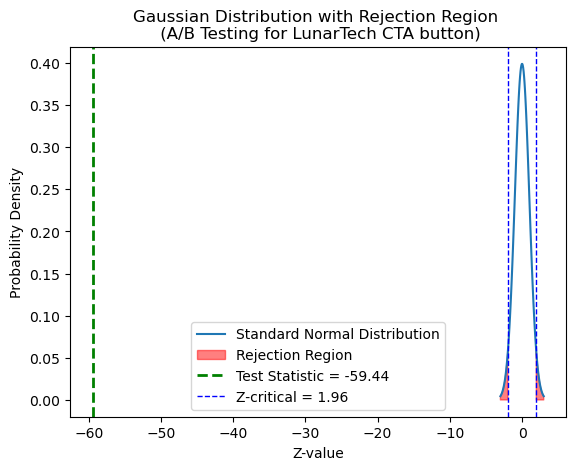

In [26]:
# Parameters for the standard normal distribution
mu = 0  # Mean
sigma = 1  # Standard deviation
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = norm.pdf(x, mu, sigma)


# Plotting the standard normal distribution
plt.plot(x, y, label='Standard Normal Distribution')
# Shade the rejection region for a two-tailed test
plt.fill_between(x, y, where=(x > Z_crit) | (x < -Z_crit), color='red', alpha=0.5, label='Rejection Region')
# Adding Test Statistic
plt.axvline(Test_stat, color='green', linestyle='dashed', linewidth=2, label=f'Test Statistic = {Test_stat:.2f}')
# Adding Z-critical values
plt.axvline(Z_crit, color='blue', linestyle='dashed', linewidth=1, label=f'Z-critical = {Z_crit:.2f}')
plt.axvline(-Z_crit, color='blue', linestyle='dashed', linewidth=1)

# Adding labels and title
plt.xlabel('Z-value')
plt.ylabel('Probability Density')
plt.title('Gaussian Distribution with Rejection Region \n (A/B Testing for LunarTech CTA button)')
plt.legend()
# Show plot
plt.show()

Calculating Confidence Interval of the test

In [27]:
# Calculate the Confidence Interval (CI) for a 2-sample Z-test
## Calculate the lower and upper bounds of the confidence interval
CI = [
    round((p_exp_hat - p_con_hat) - SE*Z_crit, 3),  # Lower bound of the CI, rounded to 3 decimal places
    round((p_exp_hat - p_con_hat) + SE*Z_crit, 3)   # Upper bound of the CI, rounded to 3 decimal places
]

# Print the calculated confidence interval
print("Confidence Interval of the 2 sample Z-test is: ", CI)

# Here, the confidence interval provides a range of values within which the true difference between the experimental and control group proportions is likely to lie with a certain level of confidence (e.g., 95%).


Confidence Interval of the 2 sample Z-test is:  [0.399, 0.426]


Testing for Practical Significance in A/B Testing

In [ ]:
def is_Practically_significant(delta, CI_95):
    """
    We assess here if the difference between Control and Experimental group is practically significant using the Minimum Detectable Effect (MDE) parameter from the Power Analysis.

    Arguments:
    - delta (float): The Minimum Detectable Effect (MDE) considered for practical significance.
    - CI_95 (tuple): A tuple representing the lower and upper bounds of the 95% Confidence Interval.

    Returns:
    - Prints whether the experiment has practical significance based on the MDE and CI.
    """

    # Extract lower bound of 95% Confidence Interval
    lower_bound_CI = CI_95[0]

    # Check if the lower bound of the CI is greater than or equal to delta
    if delta >= lower_bound_CI:
        print(f"We have practical significance! \nWith MDE of {delta}, The difference between Control and Experimental group is practically significant.")
        return True
    else:
        print("We don't have practical significance! \nThe difference between Control and Experimental group is not practically significant.")
        return False



# Call the function
significance = is_Practically_significant(delta, CI_95)
print("Lower bound of 95% confidence interval is: ", CI_95[0])


We have practical significance! 
With MDE of 0.1, The difference between Control and Experimental group is practically significant.
Lower bound of 95% confidence interval is:  0.04
